# Biostat 257 Homework 1

#### Due Apr 15 @ 11:59PM

#### Ami Sheth

## Q1

**No handwritten homework reports are accepted for this course.**  We work with Git/GitHub.  Efficient and abundant use of Git, e.g., **frequent and well-documented** commits, is an important criterion for grading your homework.

1. If you don't have a GitHub account, apply for the [Student Developer Pack](https://education.github.com/pack) at GitHub using your UCLA email.

2. Create a **private** repository `biostat-257-2022-spring` and add `Hua-Zhou` and `maschepps` (TA) as your collaborators.

3. Top directories of the repository should be `hw1`, `hw2`, ... You may create other branches for developing your homework solutions; but the `master` branch will be your presentation area. Put your homework submission files (Jupyter notebook `.ipynb`, html converted from notebook, all code and data set to reproduce results) in the `master` branch. 

4. After each homework due date, teaching assistant and instructor will check out your `master` branch for grading. Tag each of your homework submissions with tag names `hw1`, `hw2`, ...  Tagging time will be used as your submission time. That means if you tag your hw1 submission after deadline, penalty points will be deducted for late submission.  

5. Read the [style guide](https://github.com/johnmyleswhite/Style.jl) for Julia programming. Following rules in the style guide will be strictly enforced when grading: (4) four space indenting rule, (6) 80 charcter rule, (7) space after comma rule, (8) no space before comma rule, (9) space around operator rule.

## Q2

Let's check whether floating-point numbers obey certain algebraic rules. For 2-5, one counter-example suffices.

1. Associative rule for addition says `(x + y) + z == x + (y + z)`. Check association rule using `x = 0.1`, `y = 0.1` and `z = 1.0` in Julia. Explain what you find.

2. Do floating-point numbers obey the associative rule for multiplication: `(x * y) * z == x * (y * z)`?

3. Do floating-point numbers obey the distributive rule: `a * (x + y) == a * x + a * y`?  

4. Is `0 * x == 0` true for all floating-point number `x`? 

5. Is `x / a == x * (1 / a)` always true?

#### Solution Q2.1

In [97]:
x = 0.1
y = 0.1
z = 1.0

1.0

In [98]:
(x + y) + z

1.2

In [99]:
x + (y + z) 

1.2000000000000002

In [100]:
(x + y) + z == x + (y + z)

false

No, the associative rule does not hold for floating-point numbers because 0.1 cannot be defined in a finite way with the binary system.

#### Solution to Q2.2

In [101]:
x = 1.2
y = 0.1
z = 0.2

0.2

In [102]:
(x * y) * z

0.024

In [103]:
x * (y * z)

0.024000000000000004

In [104]:
(x * y) * z == x * (y * z)

false

From the counter-example above, we see that floating-point numbers do not always obey the associative rule for multiplication.

#### Solution to Q2.3

In [109]:
x = 1.2
y = 0.1
a = 0.2

0.2

In [110]:
a * (x + y) == a * x + a * y

true

From the counter-example above, we see that floating-point numbers do not always obey the distributive rule.

#### Solution to Q2.4

In [117]:
x = 1.2

1.2

In [118]:
0 * x == 0

true

From the counter-example above, we see that `0 * x == 0` is not true for all floating-point number `x`.

#### Solution to Q2.5

In [105]:
a = 0.1
x = 1.2

1.2

In [106]:
x / a

11.999999999999998

In [107]:
x * (1 / a)

12.0

In [108]:
x / a == x * (1 / a)

false

From the counter-example above, we see that `x / a == x * (1 / a)` is not always true.

## Q3

Consider Julia function
```julia
function g(k)
    for i in 1:10
        k = 5k - 1
    end
    k
end
```
1. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Int64` input.   
2. Use `@code_llvm` to find the LLVM bitcode of compiled `g` with `Float64` input.  
3. Compare the bitcode from questions 1 and 2. What do you find?  
4. Read Julia documentation on `@fastmath` and repeat the questions 1-3 on the function  

```julia
function g_fastmath(k)  
    @fastmath for i in 1:10  
        k = 5k - 1
    end
    k
end
```
    Explain what does macro `@fastmath` do?

## Q4

Create the vector `x = (0.988, 0.989, 0.990, ..., 1.010, 1.011, 1.012)`.   

1. Plot the polynomial `y = x^7 - 7x^6 + 21x^5 - 35x^4 + 35x^3 - 21x^2 + 7x - 1` at points `x`.  

2. Plot the polynomial `y = (x - 1)^7` at points `x`.  

3. Explain what you found.

#### Solution to Q4

In [7]:
x = collect(0.988:0.001:1.012)

25-element Vector{Float64}:
 0.988
 0.989
 0.99
 0.991
 0.992
 0.993
 0.994
 0.995
 0.996
 0.997
 0.998
 0.999
 1.0
 1.001
 1.002
 1.003
 1.004
 1.005
 1.006
 1.007
 1.008
 1.009
 1.01
 1.011
 1.012

In [24]:
y1 = (x .^ 7 - 7 * x .^ 6 + 21 * x .^ 5 - 35 * x .^ 4 + 35 * x.^ 3 - 21 * 
    x .^ 2 + 7 * x .- 1)

25-element Vector{Float64}:
 -3.552713678800501e-14
 -2.3092638912203256e-14
 -1.4210854715202004e-14
 -7.993605777301127e-15
 -6.217248937900877e-15
 -4.440892098500626e-15
 -1.7763568394002505e-15
 -3.552713678800501e-15
 -1.7763568394002505e-15
 -2.6645352591003757e-15
 -8.881784197001252e-16
 -1.7763568394002505e-15
  0.0
 -5.329070518200751e-15
 -6.217248937900877e-15
  1.7763568394002505e-15
 -1.7763568394002505e-15
 -8.881784197001252e-16
 -1.7763568394002505e-15
  0.0
  2.6645352591003757e-15
 -3.552713678800501e-15
  7.105427357601002e-15
  1.865174681370263e-14
  4.618527782440651e-14

In [28]:
y2 = (x .- 1) .^ 7

25-element Vector{Float64}:
 -3.583180800000022e-14
 -1.9487171000000122e-14
 -1.0000000000000062e-14
 -4.78296900000003e-15
 -2.0971520000000132e-15
 -8.235430000000051e-16
 -2.7993600000000173e-16
 -7.812500000000048e-17
 -1.6384000000000103e-17
 -2.1870000000000135e-18
 -1.280000000000008e-19
 -1.0000000000000063e-21
  0.0
  9.99999999999229e-22
  1.280000000000008e-19
  2.186999999999447e-18
  1.6384000000000103e-17
  7.812499999998834e-17
  2.7993600000000173e-16
  8.235429999999137e-16
  2.0971520000000132e-15
  4.7829689999996165e-15
  1.0000000000000062e-14
  1.9487170999998743e-14
  3.583180800000022e-14

In [5]:
using Plots
pyplot()  # set the backend to PyPlot

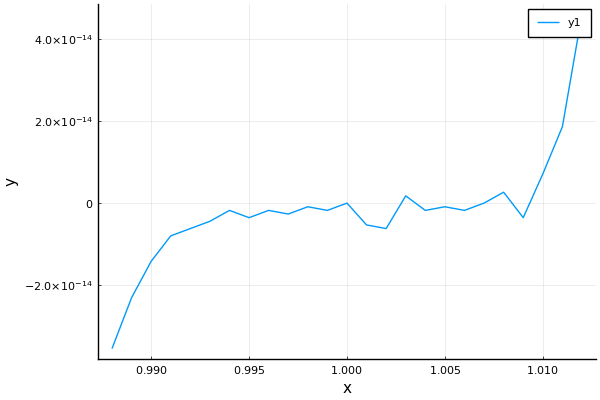

In [27]:
Plots.plot(x, y1, main = "Polynomial 1", xlab = "x", ylab = "y")

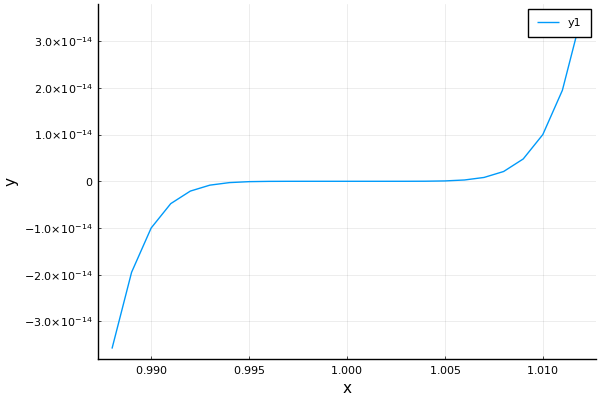

In [29]:
Plots.plot(x, y2, main = "Polynomial 2", xlab = "x", ylab = "y")

The two polynomials are the same, but when graphed the first polynomial is less smooth than the second. ###why??

## Q5

1. Show the **Sherman-Morrison formula**
$$
	(\mathbf{A} + \mathbf{u} \mathbf{u}^T)^{-1} = \mathbf{A}^{-1} - \frac{1}{1 + \mathbf{u}^T \mathbf{A}^{-1} \mathbf{u}} \mathbf{A}^{-1} \mathbf{u} \mathbf{u}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular and $\mathbf{u} \in \mathbb{R}^n$. This formula supplies the inverse of the symmetric, rank-one  perturbation of $\mathbf{A}$.

2. Show the **Woodbury formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A} \in \mathbb{R}^{n \times n}$ is nonsingular, $\mathbf{U}, \mathbf{V} \in \mathbb{R}^{n \times m}$, and $\mathbf{I}_m$ is the $m \times m$ identity matrix. In many applications $m$ is much smaller than $n$. Woodbury formula generalizes Sherman-Morrison and is valuable because the smaller matrix $\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}$ is cheaper to invert than the larger matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

3. Show the **binomial inversion formula**
$$
	(\mathbf{A} + \mathbf{U} \mathbf{B} \mathbf{V}^T)^{-1} = \mathbf{A}^{-1} - \mathbf{A}^{-1} \mathbf{U} (\mathbf{B}^{-1} + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U})^{-1} \mathbf{V}^T \mathbf{A}^{-1},
$$
where $\mathbf{A}$ and $\mathbf{B}$ are nonsingular.

4. Show the identity
$$
	\text{det}(\mathbf{A} + \mathbf{U} \mathbf{V}^T) = \text{det}(\mathbf{A}) \text{det}(\mathbf{I}_m + \mathbf{V}^T \mathbf{A}^{-1} \mathbf{U}).
$$
This formula is useful for evaluating the density of a multivariate normal with covariance matrix $\mathbf{A} + \mathbf{U} \mathbf{V}^T$.

**Hint**: 1 and 2 are special cases of 3.

## Q6

Demonstrate the following facts about triangular and orthogonal matrices in Julia (one example for each fact). Mathematically curious ones are also encouraged to prove them. 

Note a unit triangular matrix is a triangular matrix with all diagonal entries being 1.

1. The product of two upper (lower) triangular matrices is upper (lower) triangular.

2. The inverse of an upper (lower) triangular matrix is upper (lower) triangular.

3. The product of two unit upper (lower) triangular matrices is unit upper (lower) triangular.

4. The inverse of a unit upper (lower) triangular matrix is unit upper (lower) triangular.

5. An orthogonal upper (lower) triangular matrix is diagonal. (You just need to prove this.)

6. The product of two orthogonal matrices is orthogonal.